In [ ]:
# Matplotlib

# Vẽ hình đơn lẻ
  # Trực quan hoá 1 biến (số) => Phân bổ dữ liệu => histogram => plt.hist()
  # Trực quan hoá 2 biến (số) => Tương quan => scatter => plt.scatter()
  # 1 biến số và 1 biến categorical => So sánh => bar chart => plt.bar()
  # sự thay đổi theo thời gian => xu hướng => line chart => plt.plot()
  # sự cấu phần => pie chart => plt.pie() (cẩn thận với pie chart)

# Cho nhiều hình vào cùng nhau
  # Cùng 1 hình
    # Cùng trục:
      # hình 1
      # hình 2
      # plt.show()
    # Khác trục (trục của hình 1 ở tay trái, trục hình 2 ở tay phải)
      # hình 1
      # chỉ định trục:
        # axes1 = plt.gca()
        # axes2 = axes1.twinx()
      # hình 2: axes2.hình
  # Cùng 1 khung (figure)
    # khai báo khung: fig, ax = plt.subplots(2,2)
    # hình 1: ax[0][0].
    # hình 2: ax[0][1].
    # hình 3: ax[1][0].
    # hình 4: ax[1][1].

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Phần 1: Food Price in Turkey

1. Vẽ các biểu đồ cột so sánh giá Milk (powder, infant formula) và Fuel (gas) tháng 12 cuối năm năm 2019 của Ankara, Istanbul, Izmir và National Average.

2. Vẽ các biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail), giá Fuel (gas) trung bình cả nước (National Average) trong năm 2016, 2018, 2019 tại Thổ Nhĩ Kì.

3. Vẽ biểu đồ Scatter phân tích mối liên quan giữa giá gạo và giá gas trung bình quốc gia (National Average) tại Thổ Nhĩ Kì các năm 2016, 2018, 2019.

In [ ]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [ ]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [ ]:
# Vẽ biểu đồ cột so sánh giá Milk và giá Fuel tháng 12 năm 2019 của Ankara, Istanbul, Izmir, và National Average

In [ ]:
# bar chart:
  # trục x: Place
  # trục y: Price (group bar chart) Milk & Fuel

In [ ]:
# Place
# Price Milk
# Price Fuel
# Chỉ bao gồm dữ liệu của tháng 12 năm 2019 thôi => lọc dữ liệu

In [ ]:
df['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [ ]:
# Bước 1: Lọc dữ liệu => Chỉ bao gồm dữ liệu của tháng 12 năm 2019 thôi
df_filtered = df[(df['Year'] == 2019) & (df['Month'] == 12)]

In [ ]:
# Bước 2: Tạo cột Price Milk
df_milk = df_filtered[df_filtered['ProductName'] == 'Milk (powder, infant formula) - Retail'][['Place', 'Price']].reset_index(drop=True)
df_milk.rename(columns={'Price':'Price_Milk'}, inplace=True)
df_milk

,Place,Price_Milk
0,National Average,124.8845
1,Ankara,128.4533
2,Istanbul,122.7862
3,Izmir,147.1558


In [ ]:
# Bước 3: Tạo cột Price Fuel
df_fuel = df_filtered[df_filtered['ProductName'] == 'Fuel (gas) - Retail'][['Place', 'Price']].reset_index(drop=True)
df_fuel.rename(columns={'Price':'Price_Fuel'}, inplace=True)
df_fuel

,Place,Price_Fuel
0,National Average,108.5535
1,Ankara,106.0534
2,Istanbul,112.4568
3,Izmir,109.1172


In [ ]:
# Bước 4: Kết hợp 1,2,3 => Tạo bảng có cột Place, Price_Milk, Price_Fuel, và nó chỉ có dữ liệu tại tháng 12/2019
df1 = pd.merge(df_milk, df_fuel, how='inner', on='Place')
df1

,Place,Price_Milk,Price_Fuel
0,National Average,124.8845,108.5535
1,Ankara,128.4533,106.0534
2,Istanbul,122.7862,112.4568
3,Izmir,147.1558,109.1172


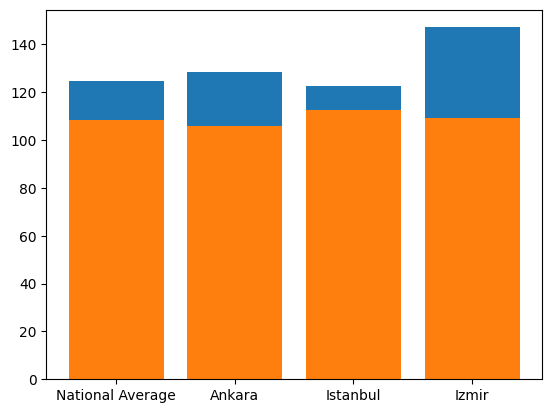

In [ ]:
plt.bar(df_milk['Place'], df_milk['Price_Milk'])
plt.bar(df_fuel['Place'], df_fuel['Price_Fuel'])
plt.show()

<Axes: xlabel='Place'>

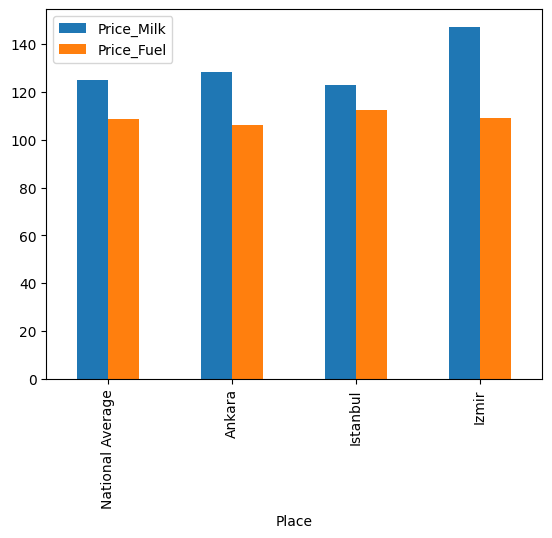

In [ ]:
# Bước 5: Vẽ
df1.plot(x='Place',
         y=['Price_Milk', 'Price_Fuel'],
         kind='bar')

In [ ]:
# Vẽ các biểu đồ đường phân tích xu hướng
  # giá gạo (Rice-Retail),
  # giá Fuel (gas)
  # tại National Average (=> lọc dữ liệu)
  # trong năm 2016, 2018, 2019 tại Thổ Nhĩ Kì

In [ ]:
# 3 biểu đồ đường
# BD1: xu hướng theo tháng của giá gạo và giá gas năm 2016 tại National Average
# BD2: xu hướng theo tháng của giá gạo và giá gas năm 2018 tại National Average
# BD3: xu hướng theo tháng của giá gạo và giá gas năm 2019 tại National Average
# Cho 3 biểu đồ cùng 1 khung

In [ ]:
# lấy ra giá gạo, giá gas tại National Average
df_rice = df[(df['ProductName'] == 'Rice - Retail') & (df['Place'] == 'National Average')]
df_fuel = df[(df['ProductName'] == 'Fuel (gas) - Retail') & (df['Place'] == 'National Average')]

In [ ]:
# 2016
df_rice_2016 = df_rice[df_rice['Year'] == 2016]
df_fuel_2016 = df_fuel[df_fuel['Year'] == 2016]

In [ ]:
# 2018
df_rice_2018 = df_rice[df_rice['Year'] == 2018]
df_fuel_2018 = df_fuel[df_fuel['Year'] == 2018]

In [ ]:
# 2019
df_rice_2019 = df_rice[df_rice['Year'] == 2019]
df_fuel_2019 = df_fuel[df_fuel['Year'] == 2019]

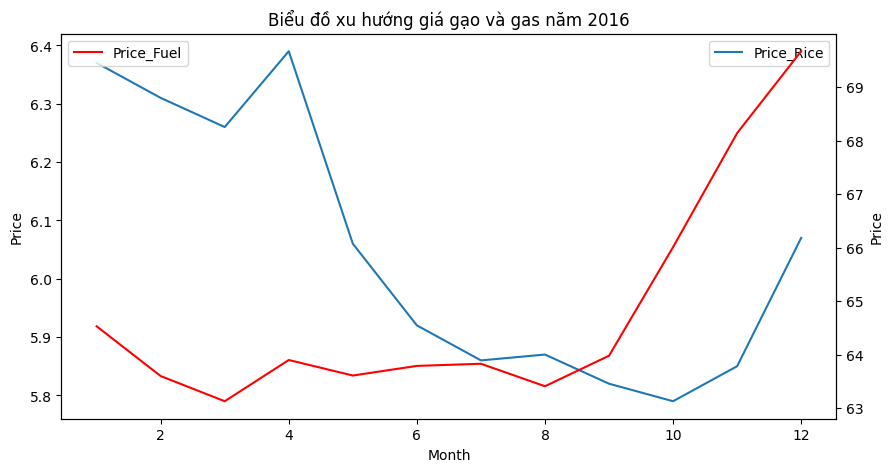

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_rice_2016['Month'], df_rice_2016['Price'], label='Price_Rice')
axes1 = plt.gca()
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2016['Month'], df_fuel_2016['Price'], c='r', label='Price_Fuel')
plt.legend()
axes1.set_xlabel('Month')
axes1.set_ylabel('Price')
axes2.set_ylabel('Price')
plt.title('Biểu đồ xu hướng giá gạo và gas năm 2016')
plt.show()

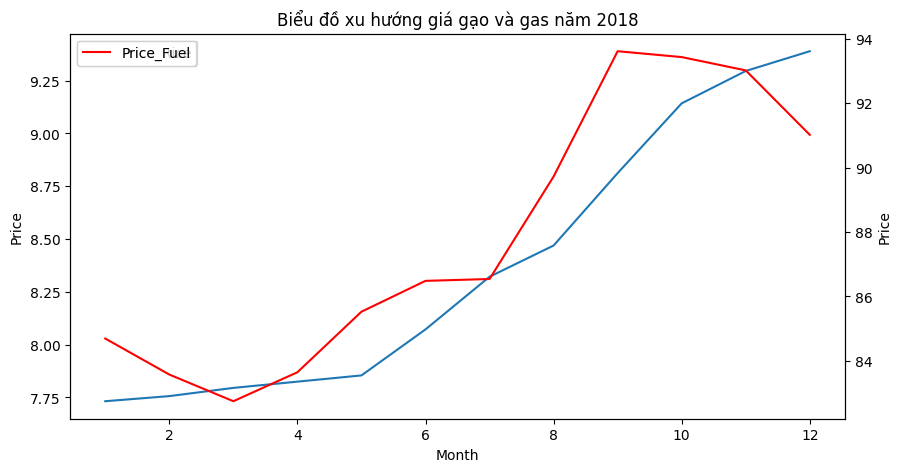

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_rice_2018['Month'], df_rice_2018['Price'], label='Price_Rice')
axes1 = plt.gca()
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2018['Month'], df_fuel_2018['Price'], c='r', label='Price_Fuel')
plt.legend()
axes1.set_xlabel('Month')
axes1.set_ylabel('Price')
axes2.set_ylabel('Price')
plt.title('Biểu đồ xu hướng giá gạo và gas năm 2018')
plt.show()

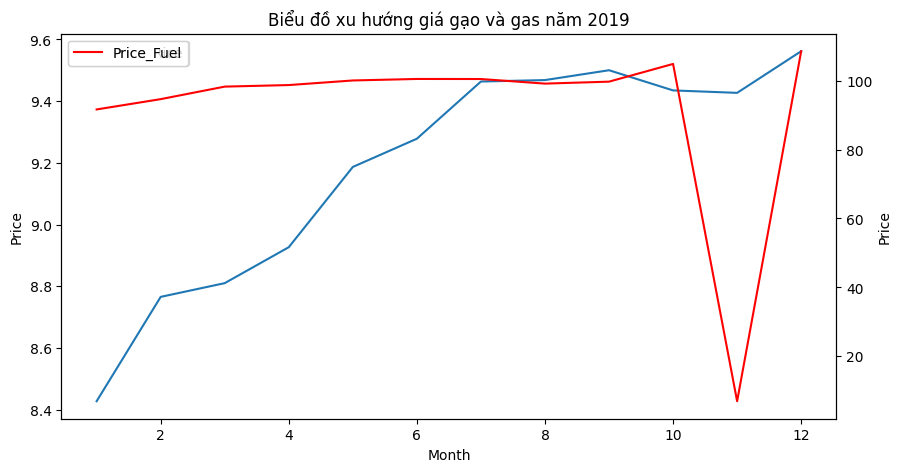

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_rice_2019['Month'], df_rice_2019['Price'], label='Price_Rice')
axes1 = plt.gca()
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2019['Month'], df_fuel_2019['Price'], c='r', label='Price_Fuel')
plt.legend()
axes1.set_xlabel('Month')
axes1.set_ylabel('Price')
axes2.set_ylabel('Price')
plt.title('Biểu đồ xu hướng giá gạo và gas năm 2019')
plt.show()

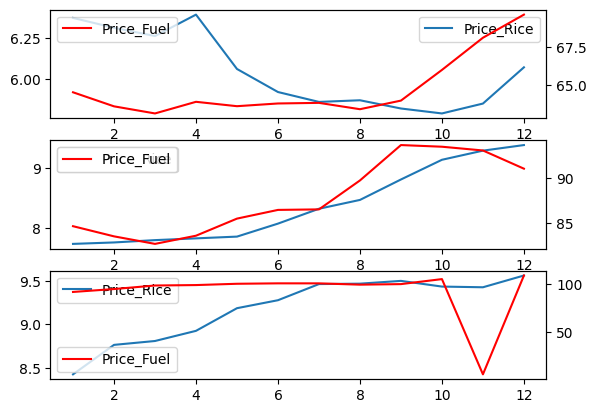

In [ ]:
fig, ax = plt.subplots(3,1)

ax[0].plot(df_rice_2016['Month'], df_rice_2016['Price'], label='Price_Rice')
axes1 = ax[0]
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2016['Month'], df_fuel_2016['Price'], c='r', label='Price_Fuel')
plt.legend()

ax[1].plot(df_rice_2018['Month'], df_rice_2018['Price'], label='Price_Rice')
axes1 = ax[1]
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2018['Month'], df_fuel_2018['Price'], c='r', label='Price_Fuel')
plt.legend()

ax[2].plot(df_rice_2019['Month'], df_rice_2019['Price'], label='Price_Rice')
axes1 = ax[2]
axes1.legend()
axes2 = axes1.twinx()
axes2.plot(df_fuel_2019['Month'], df_fuel_2019['Price'], c='r', label='Price_Fuel')
plt.legend()

plt.show()

In [ ]:
# Khung chính: seaborn
# Trang trí: matplotlib
  # title
  # x label
  # y label
  # legend
  # ...

In [ ]:
# Code Gym
# Tất cả: matplotlib
# Hình nâng cao: seaborn